In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
"""sl_no
Serial Number

gender
Gender- Male='M',Female='F'

ssc_p
Secondary Education percentage- 10th Grade

ssc_b
Board of Education- Central/ Others

hsc_p
Higher Secondary Education percentage- 12th Grade

hsc_b
Board of Education- Central/ Others

hsc_s
Specialization in Higher Secondary Education

degree_p
Degree Percentage

degree_t
Under Graduation(Degree type)- Field of degree education

workex
Work Experience

etest_p
Employability test percentage ( conducted by college)

specialisation
Post Graduation(MBA)- Specialization

mba_p
MBA percentage

status
Status of placement- Placed/Not placed

salary
Salary offered by corporate to candidates"""

"sl_no\nSerial Number\n\ngender\nGender- Male='M',Female='F'\n\nssc_p\nSecondary Education percentage- 10th Grade\n\nssc_b\nBoard of Education- Central/ Others\n\nhsc_p\nHigher Secondary Education percentage- 12th Grade\n\nhsc_b\nBoard of Education- Central/ Others\n\nhsc_s\nSpecialization in Higher Secondary Education\n\ndegree_p\nDegree Percentage\n\ndegree_t\nUnder Graduation(Degree type)- Field of degree education\n\nworkex\nWork Experience\n\netest_p\nEmployability test percentage ( conducted by college)\n\nspecialisation\nPost Graduation(MBA)- Specialization\n\nmba_p\nMBA percentage\n\nstatus\nStatus of placement- Placed/Not placed\n\nsalary\nSalary offered by corporate to candidates"

In [4]:
df_copy = df.copy()

In [5]:
df.shape

(215, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [7]:
df.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [8]:
#fill null values in salary column with zeroes
df['salary'].fillna(0,inplace=True)

In [9]:
#sum of null values after filling
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [10]:
#dropping unnecessary columns
df.drop(['sl_no','ssc_b','hsc_b'],axis=1,inplace=True)
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [11]:
#create a one column df with the "status" column and check if value "Not Placed" is the "status" column corresponds with 0 in the "salary" column
df_status = df[["status"]]
df_status["salary"] = df["salary"]
df_status[df_status["status"] == "Not Placed"].salary.value_counts()



C:\Users\Administrator\AppData\Local\Temp\ipykernel_22116\3479778166.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_status["salary"] = df["salary"]


0.0    67
Name: salary, dtype: int64

In [12]:
#judging by the above counts, we can see from the first info:
# 14  salary          148 non-null    float64
#and from the above cell:
#0.0    67
#Name: salary, dtype: int64
#meaning that all the 67 null values were NaN for Not Placed

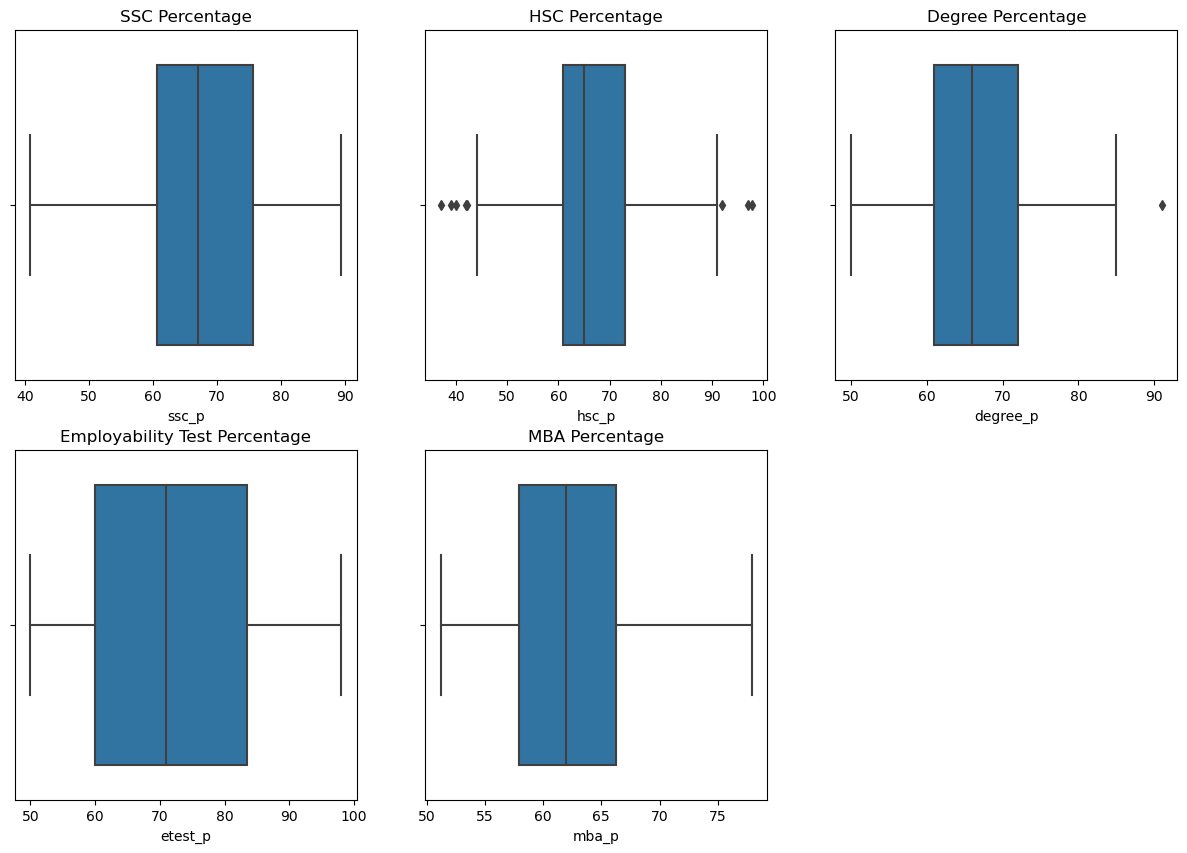

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a grid of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Plot the first boxplot in the top-left subplot
sns.boxplot(x=df['ssc_p'], ax=axs[0, 0])
axs[0, 0].set_title('SSC Percentage')

# Plot the second boxplot in the top-middle subplot
sns.boxplot(x=df['hsc_p'], ax=axs[0, 1])
axs[0, 1].set_title('HSC Percentage')

# Plot the third boxplot in the top-right subplot
sns.boxplot(x=df['degree_p'], ax=axs[0, 2])
axs[0, 2].set_title('Degree Percentage')

# Plot the fourth boxplot in the bottom-left subplot
sns.boxplot(x=df['etest_p'], ax=axs[1, 0])
axs[1, 0].set_title('Employability Test Percentage')

# Plot the fifth boxplot in the bottom-middle subplot
sns.boxplot(x=df['mba_p'], ax=axs[1, 1])
axs[1, 1].set_title('MBA Percentage')

# Hide the bottom-right subplot
axs[1, 2].axis('off')

# Show the plot
plt.show()

<AxesSubplot:xlabel='hsc_p'>

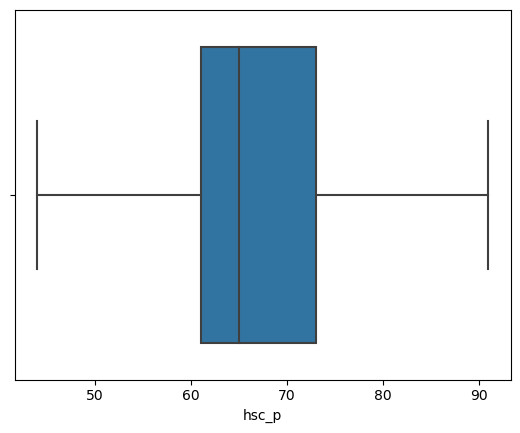

In [14]:
#remove outliers for hsc_p of lower 25% and upper 25% of the data
q1 = df['hsc_p'].quantile(0.25)
q3 = df['hsc_p'].quantile(0.75)
iqr = q3-q1
df = df[~((df['hsc_p'] < (q1-1.5*iqr)) | (df['hsc_p'] > (q3+1.5*iqr)))]

#show the boxplot after removing outliers
sns.boxplot(x=df['hsc_p'])


d:\python\odyn\anak2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


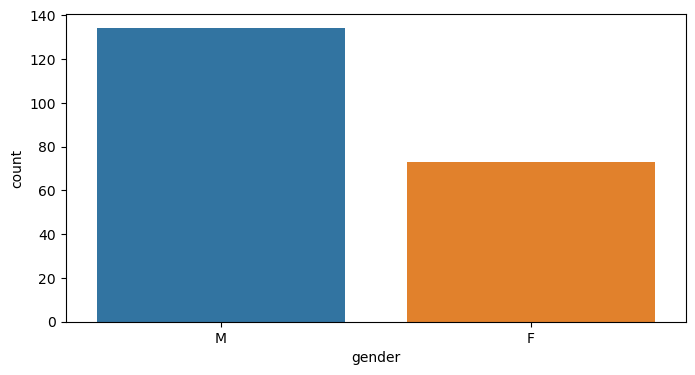

d:\python\odyn\anak2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


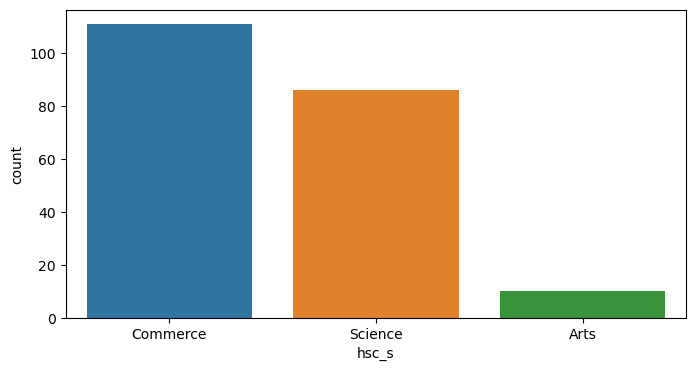

d:\python\odyn\anak2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


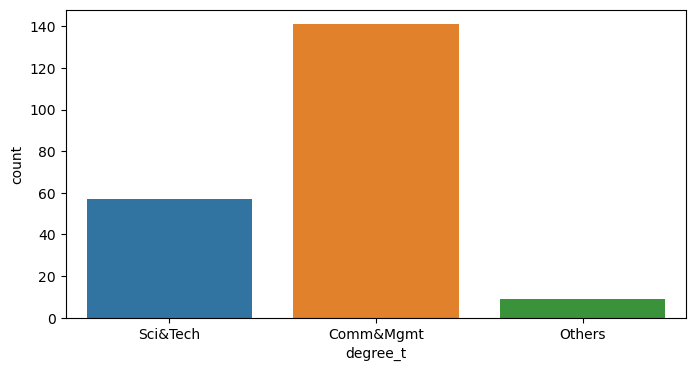

d:\python\odyn\anak2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


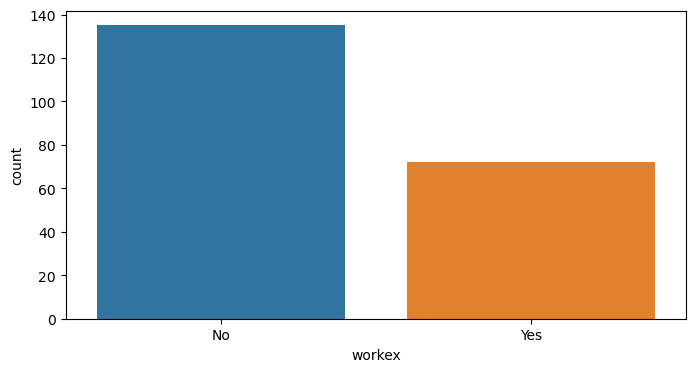

d:\python\odyn\anak2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


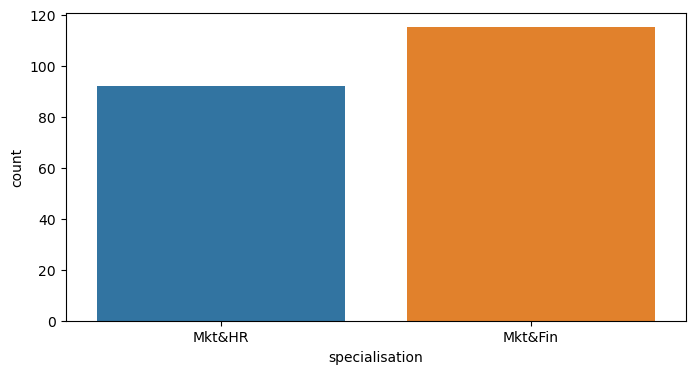

d:\python\odyn\anak2\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


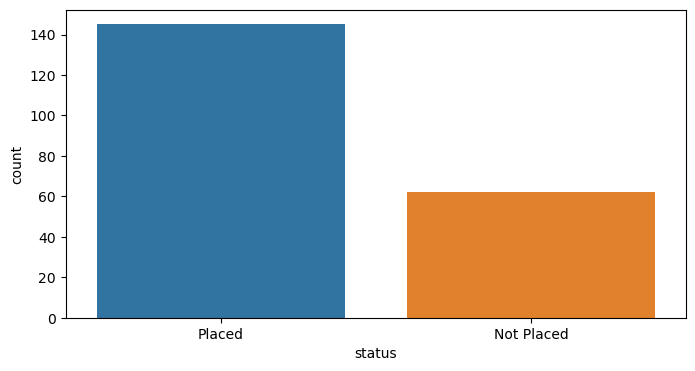

In [15]:
#count plot of categorical features
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(df[col])
    plt.show()


d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='salary', ylabel='Density'>

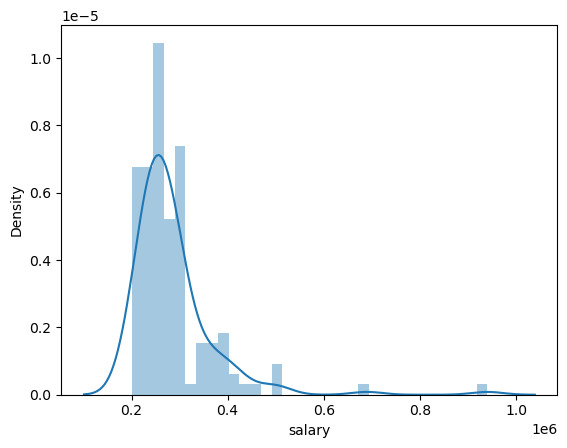

In [16]:
#distribution of salary only for placed students in status column
sns.distplot(df[df['status']=='Placed']['salary'])



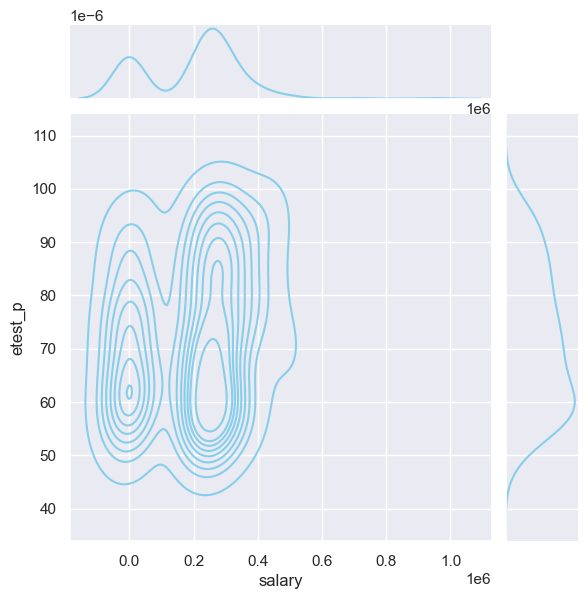

In [17]:
#joint plot of salary and employability score
sns.set(rc={'figure.figsize':(15,12)})
sns.jointplot(x='salary',y='etest_p',data=df,kind='kde', color="skyblue")


d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\python\odyn\anak2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

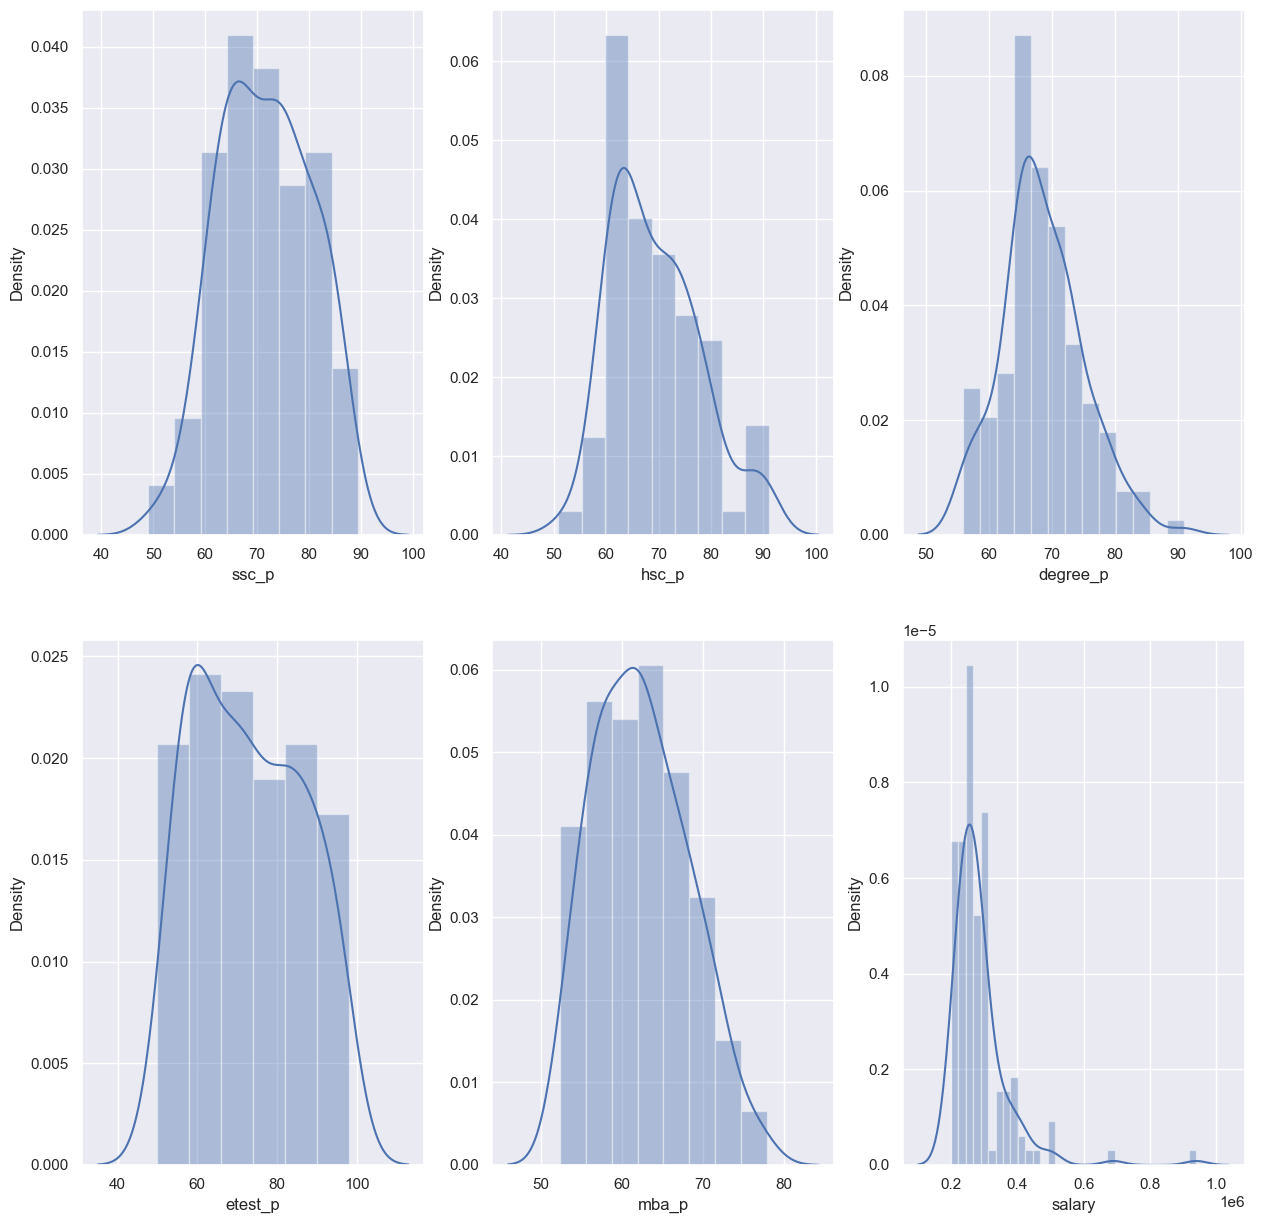

In [18]:
# Filter the DataFrame to exclude rows where salary is equal to 0
df_filtered = df[df['salary'] != 0]

# Create a grid of subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 15))

# Plot the distribution plot for each percentage in a separate subplot
sns.distplot(df_filtered['ssc_p'],ax=axes[0,0])
sns.distplot(df_filtered['hsc_p'],ax=axes[0,1])
sns.distplot(df_filtered['degree_p'],ax=axes[0,2])
sns.distplot(df_filtered['etest_p'],ax=axes[1,0])
sns.distplot(df_filtered['mba_p'],ax=axes[1,1])
sns.distplot(df_filtered['salary'],ax=axes[1,2])

# Show the plot
plt.show()

<AxesSubplot:xlabel='workex', ylabel='count'>

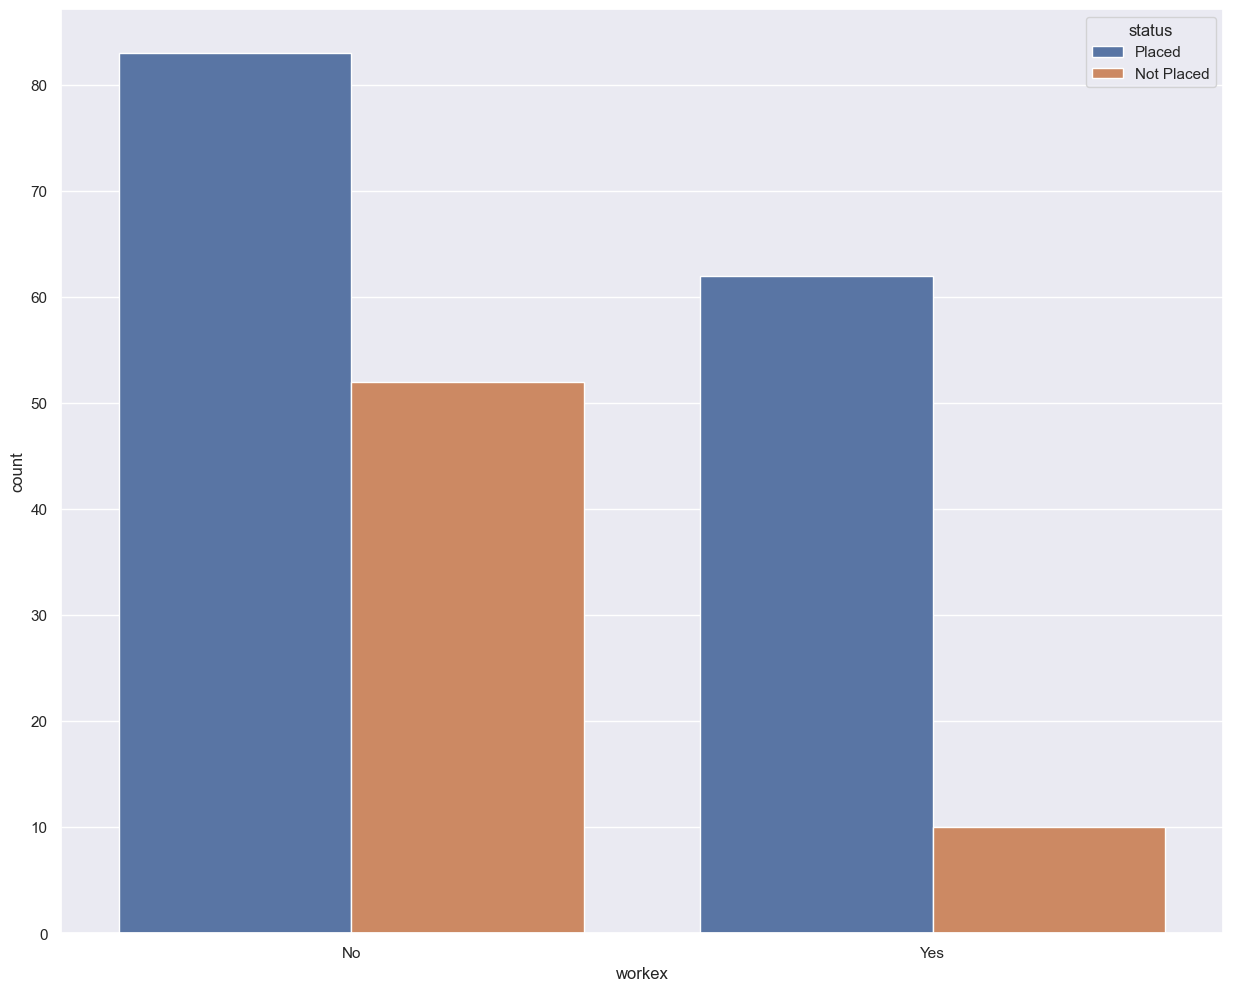

In [19]:
#Work experience Vs Placement Status
sns.countplot(x='workex',hue='status',data=df)


<AxesSubplot:xlabel='status', ylabel='ssc_p'>

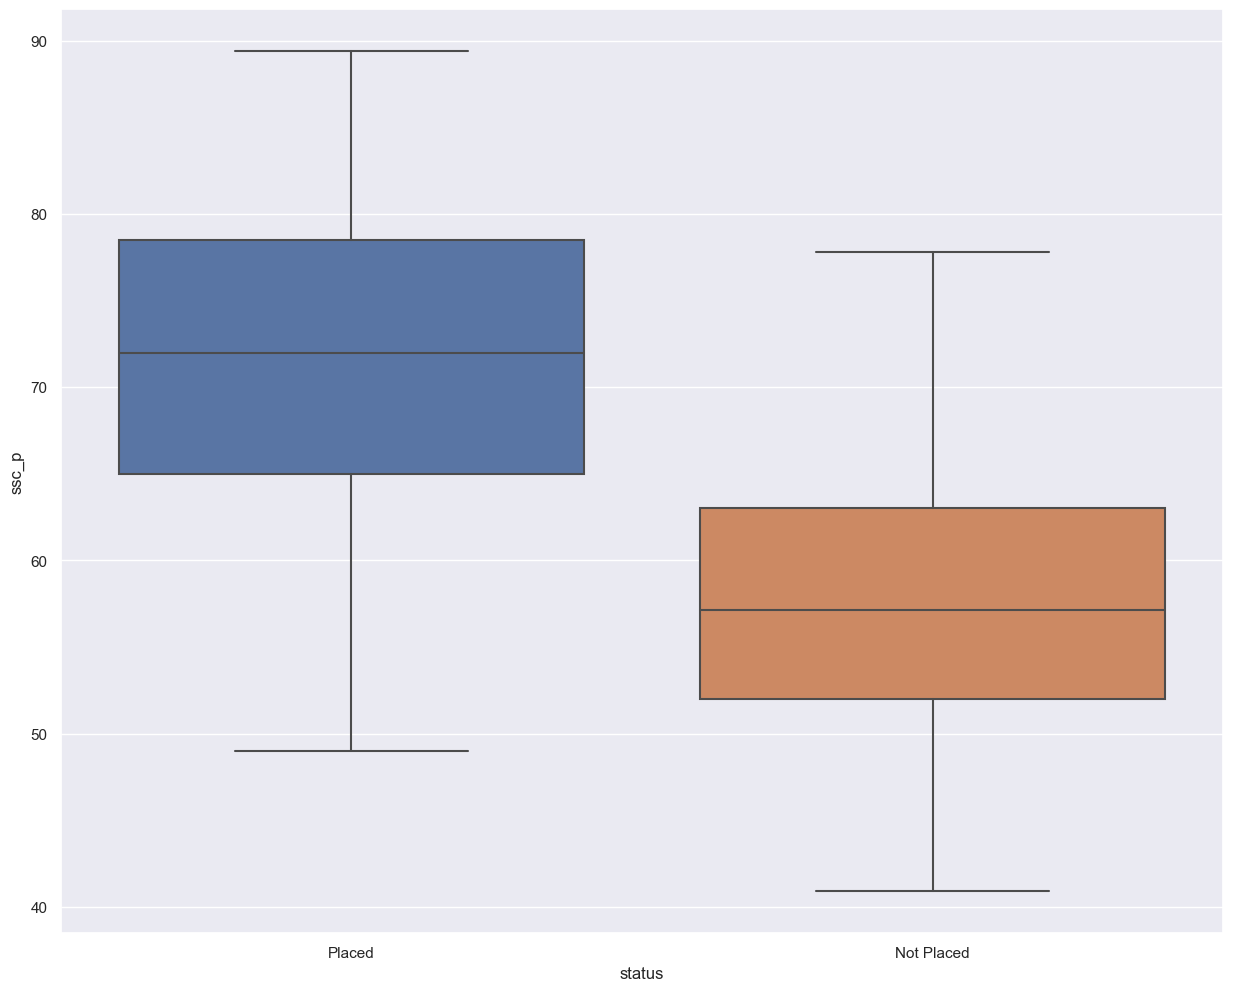

In [20]:
#academic score vs placement status
sns.boxplot(x='status',y='ssc_p',data=df)


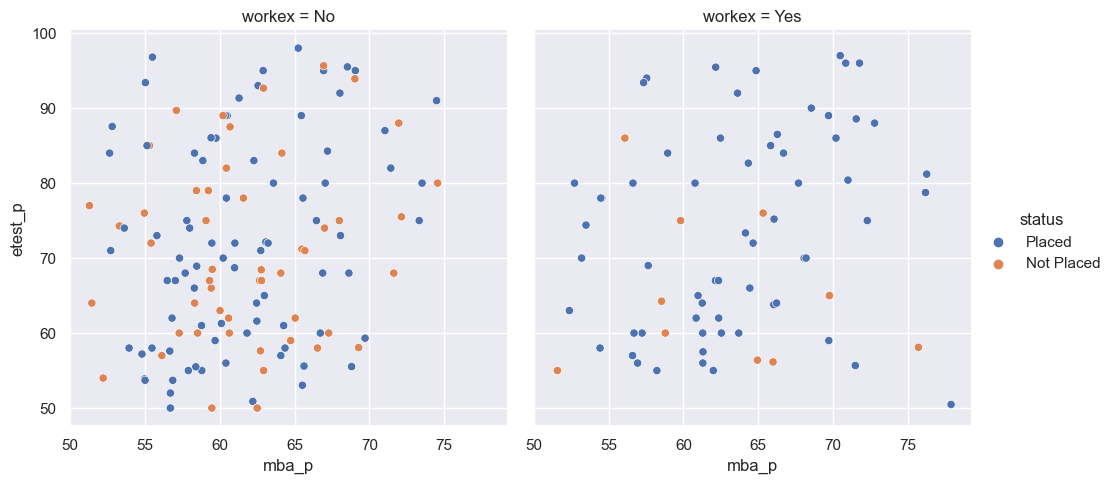

In [24]:
#correlation of MBA % and employability score

sns.relplot(x='mba_p', y='etest_p', hue='status', col='workex', data=df, kind='scatter')

<AxesSubplot:>

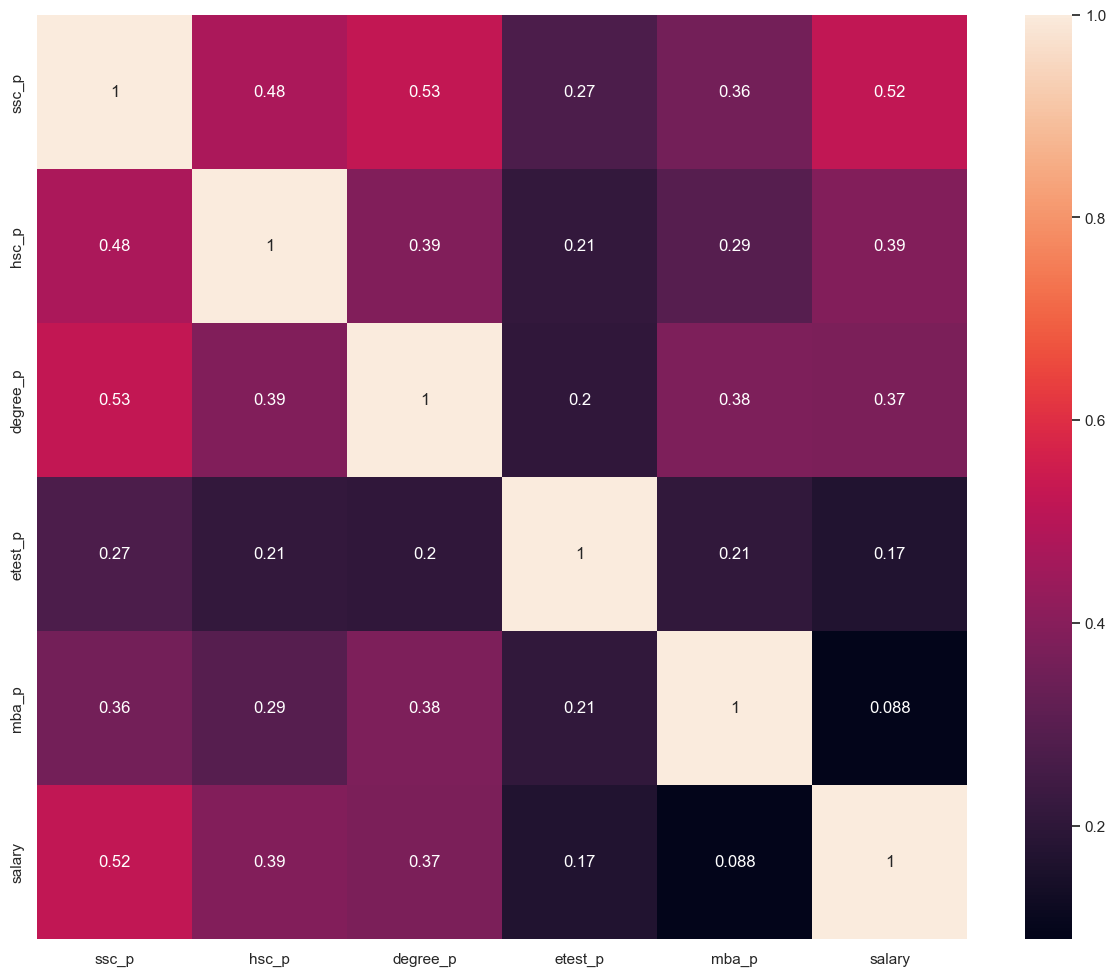

In [25]:
#corelation between academic performance and placement

sns.heatmap(df.corr(),annot=True)

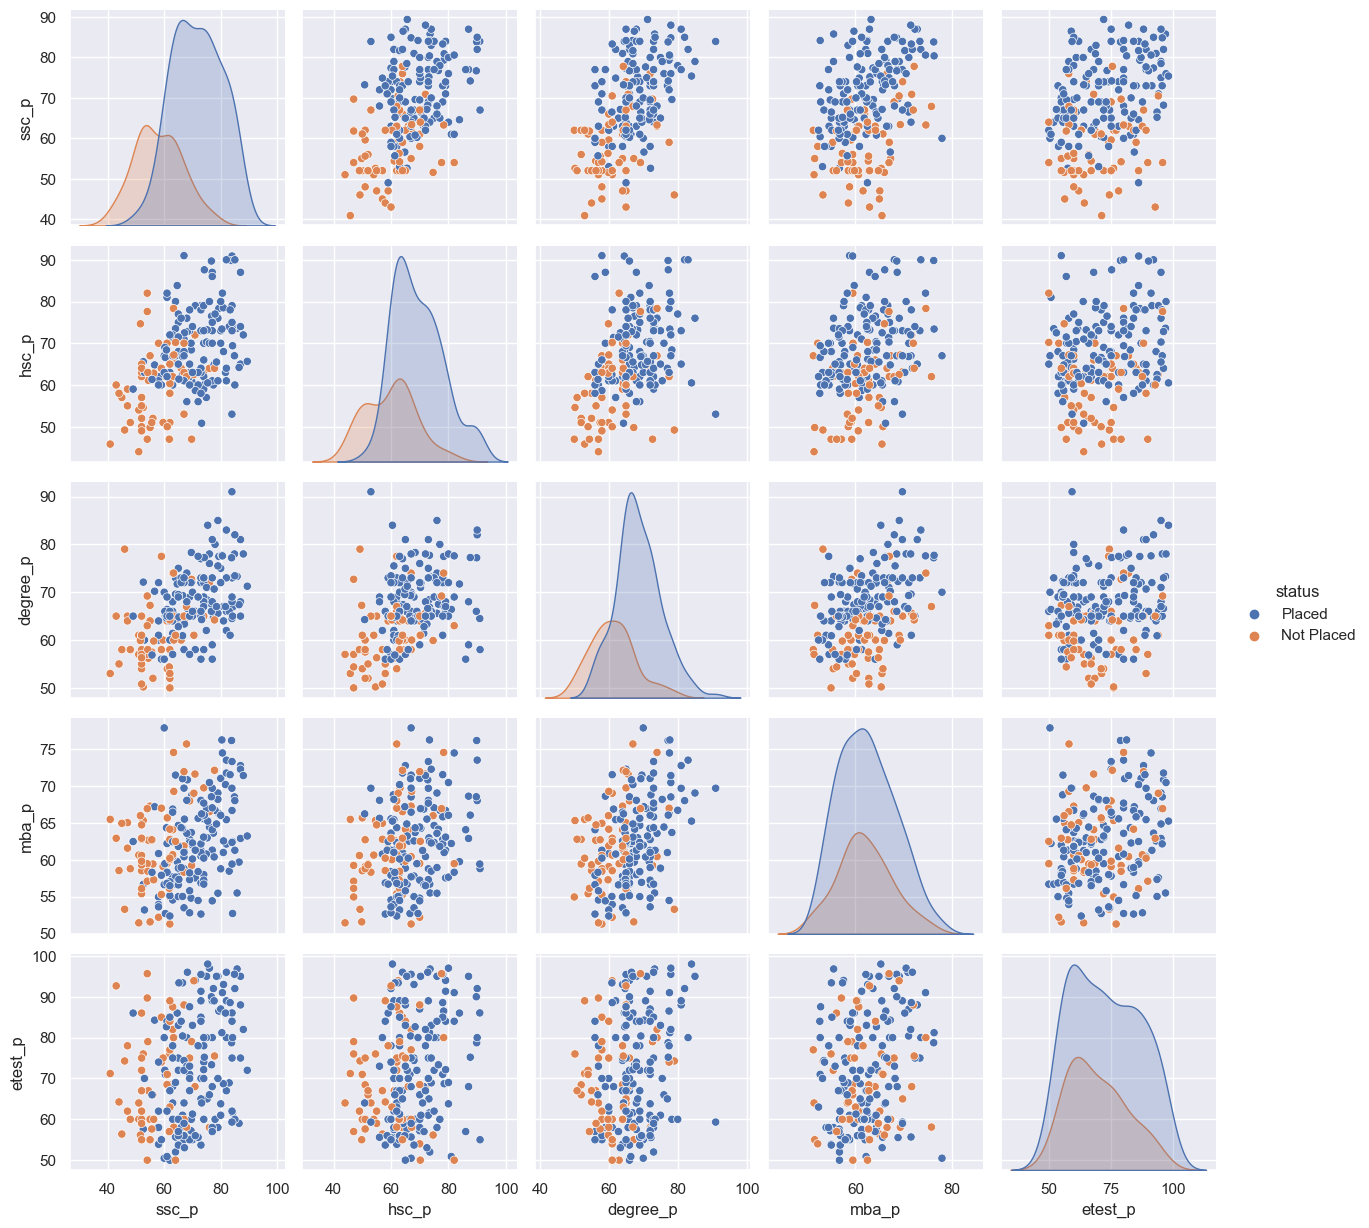

In [26]:
#pairplot
sns.pairplot(data=df, vars=['ssc_p','hsc_p','degree_p','mba_p','etest_p'], hue='status')

In [27]:
#data preprocessing
#encoding

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1,425000.0


In [30]:
#one hot encoding

dummy_hsc_s = pd.get_dummies(df['hsc_s'], prefix='dummy')
dummy_degree_t = pd.get_dummies(df['degree_t'], prefix='dummyy')
df_coded = pd.concat([df, dummy_hsc_s, dummy_degree_t], axis=1)
df_coded.drop(['hsc_s', 'degree_t', 'salary'], axis=1, inplace=True)
df_coded.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_0,dummy_1,dummy_2,dummyy_0,dummyy_1,dummyy_2
0,1,67.00,91.00,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,1,79.33,78.33,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,1,65.00,68.00,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,1,56.00,52.00,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,1,85.80,73.60,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


In [31]:
num_cols = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']
features = ['gender','ssc_p','hsc_p','hsc_p','workex','etest_p','specialisation','mba_p',
              'dummy_0','dummy_1','dummy_2','dummyy_0','dummyy_1','dummyy_2']

In [32]:
X=df_coded.drop(['status'],axis=1)
y=df_coded['status']

In [33]:
#split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=1)
#print shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(165, 14) (42, 14) (165,) (42,)


d:\python\odyn\anak2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of logistic regression classifier:  0.9047619047619048
[[11  2]
 [ 2 27]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.93      0.93      0.93        29

    accuracy                           0.90        42
   macro avg       0.89      0.89      0.89        42
weighted avg       0.90      0.90      0.90        42



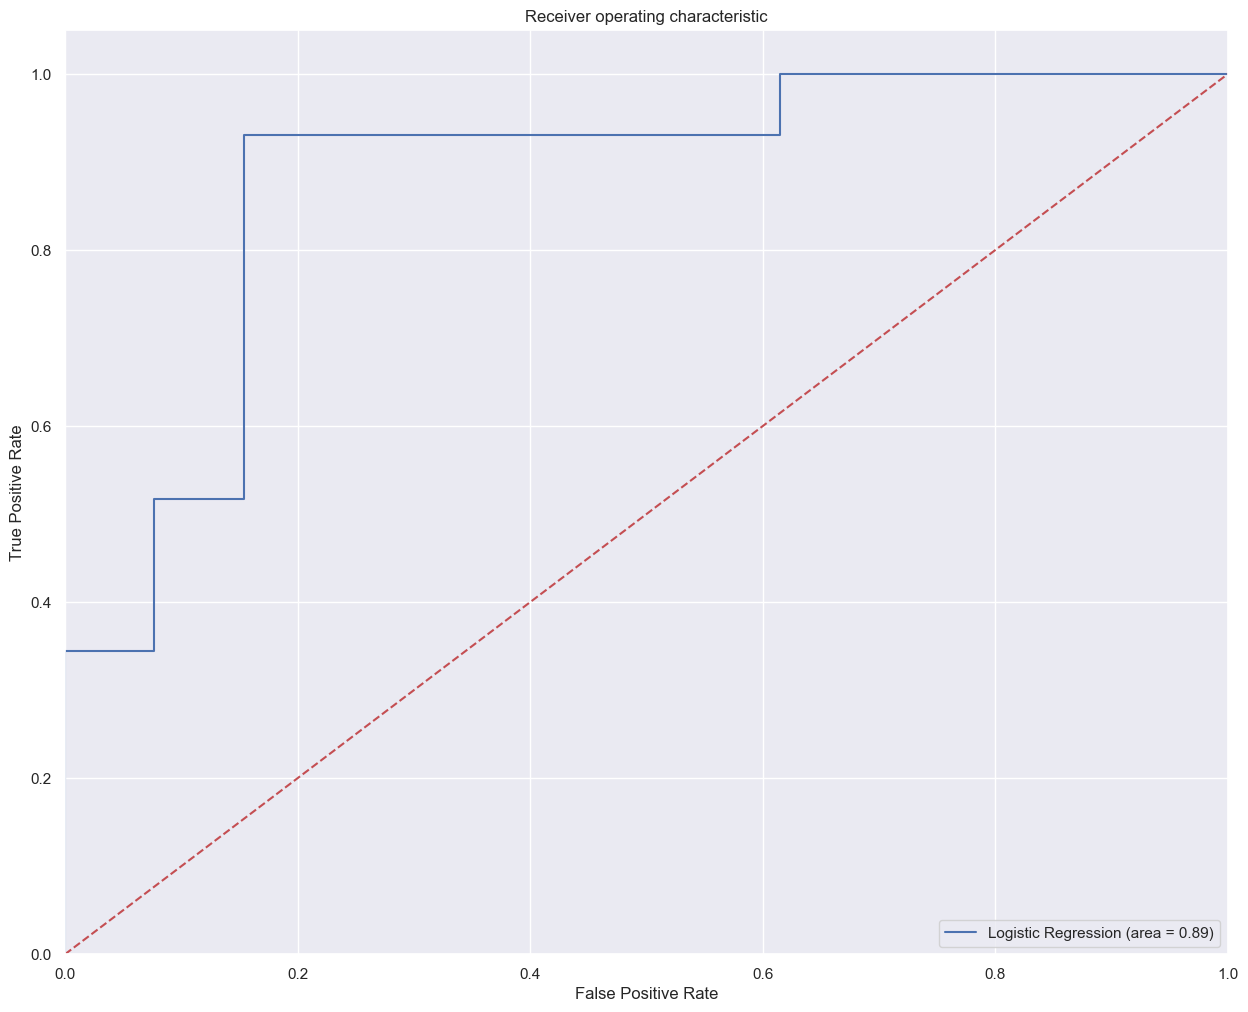

[0.76190476 0.9047619  0.80952381 0.80952381 0.95238095 0.80952381
 0.95238095 0.9        0.8        0.9       ]
0.86


d:\python\odyn\anak2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\python\odyn\anak2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [42]:
#logistic regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

#accuracy
print("Accuracy of logistic regression classifier: ", logreg.score(X_test, y_test))

#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

#plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.savefig("Log_ROC")
plt.show()

#AUC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

#cross validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
print(scores)
print(scores.mean())


In [43]:
#KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.8333333333333334


d:\python\odyn\anak2\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


d:\python\odyn\anak2\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
d:\python\odyn\anak2\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

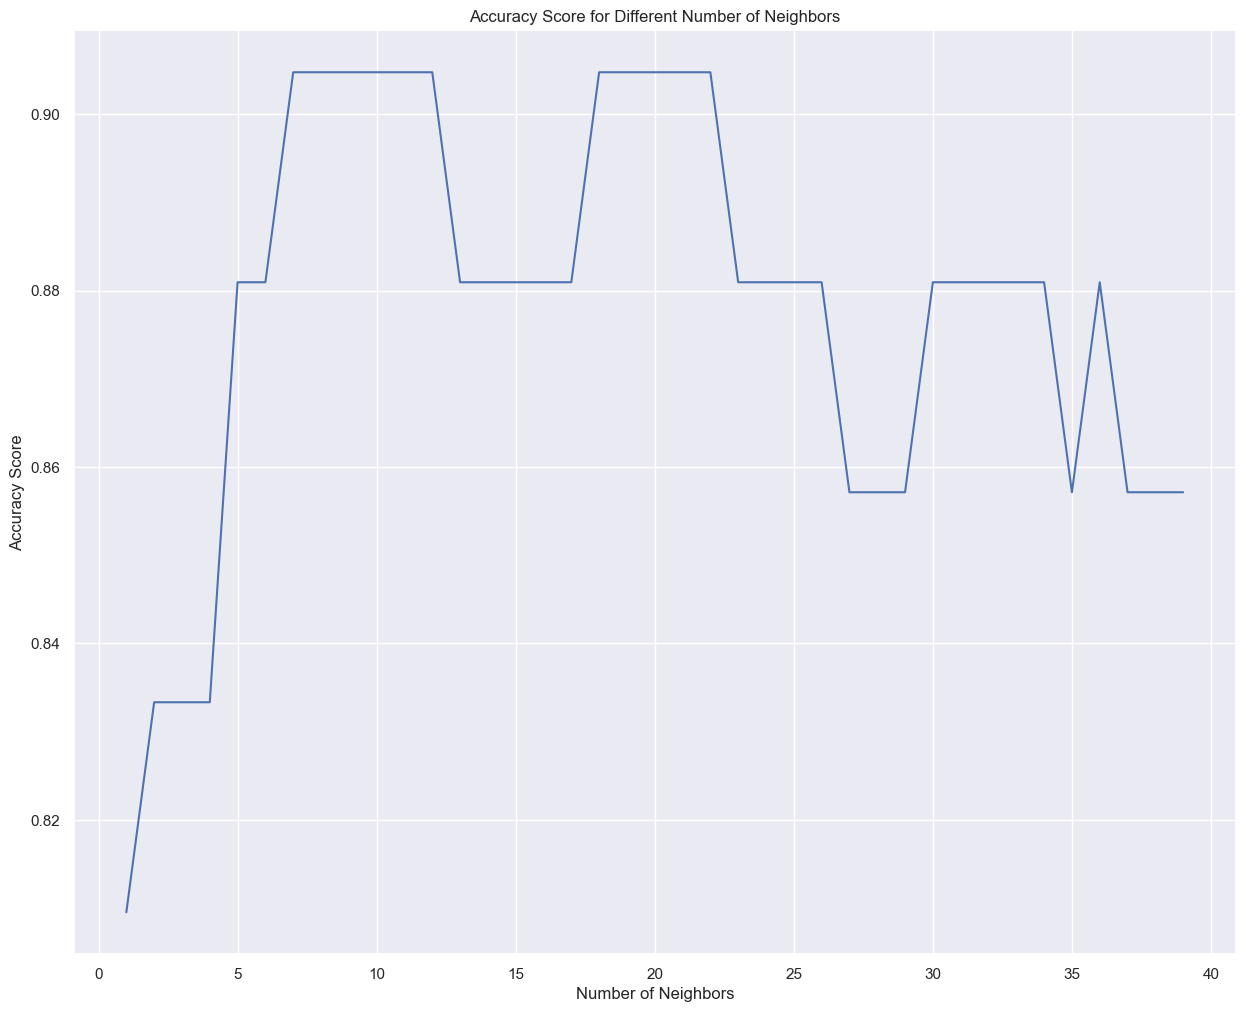

In [45]:
#create a function that checks for the best amount of neighbors
def check_neighbors(X_train, y_train, X_test, y_test, k):
    #create a list of scores
    scores = []
    #create a list of neighbors
    neighbors = []
    #create a for loop that goes through the range of k
    for i in range(1, k):
        #create a KNN classifier with the current k
        knn = KNeighborsClassifier(n_neighbors=i)
        #fit the model
        knn.fit(X_train, y_train)
        #append the score to the scores list
        scores.append(knn.score(X_test, y_test))
        #append the current k to the neighbors list
        neighbors.append(i)
    #return the scores and neighbors list
    return scores, neighbors

#call the function
scores, neighbors = check_neighbors(X_train, y_train, X_test, y_test, 40)

#plot the scores
plt.plot(neighbors, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Number of Neighbors')
plt.show()


In [46]:
#random forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
from sklearn.metrics import accuracy_score
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy: ", rf_acc)


Random Forest Accuracy:  0.9047619047619048


In [47]:
#decision tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_pred))
from sklearn.metrics import f1_score
print('F1 score: ', f1_score(y_test, y_pred))

Accuracy:  0.6904761904761905
F1 score:  0.7636363636363636


In [48]:
#xgboost

import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


d:\python\odyn\anak2\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's auc: 0.809019
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's auc: 0.823607
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's auc: 0.831565
[LightGBM] [Warning] No further splits with positive gain,

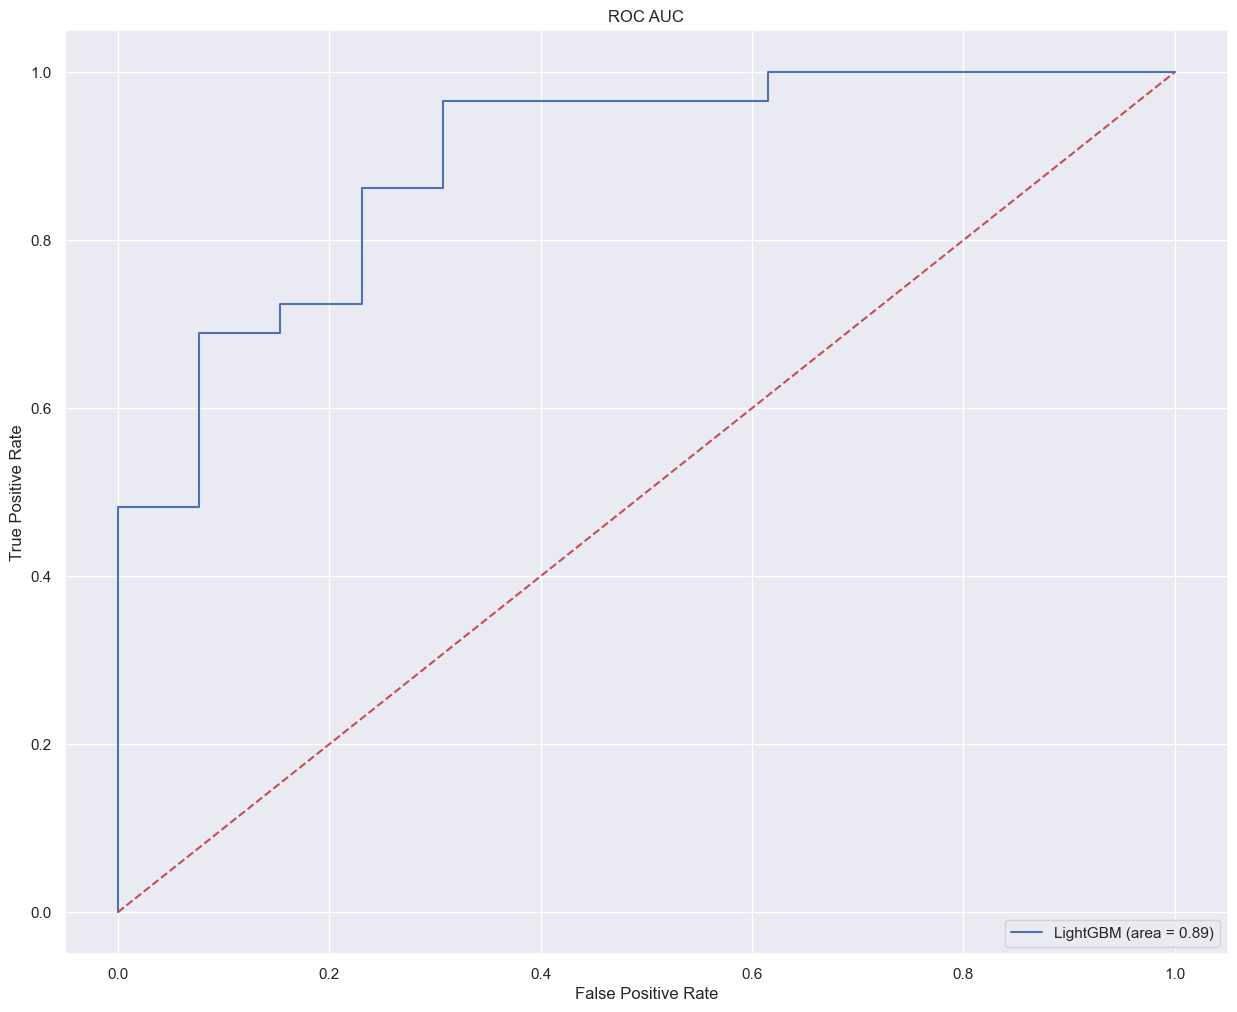

In [49]:
#lightboost

import lightgbm as lgb

# Create the LightGBM data containers
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Train the model
parameters = {
    'application': 'binary',
    'objective': 'binary',
    'metric': 'auc',
    'is_unbalance': 'true',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'feature_fraction': 0.5,
    'bagging_fraction': 0.5,
    'bagging_freq': 20,
    'learning_rate': 0.05,
    'verbose': 0
}

model = lgb.train(parameters,
                    train_data,
                    valid_sets=test_data,
                    num_boost_round=5000,
                    early_stopping_rounds=100)

# Predictions
predictions_lgbm_prob = model.predict(X_test)
predictions_lgbm_01 = np.where(predictions_lgbm_prob > 0.5, 1, 0) # Turn probability to 0-1 binary output

# Print accuracy
accuracy_lgbm = accuracy_score(y_test, predictions_lgbm_01)
print(accuracy_lgbm)

# Print Area Under Curve
auc_lgbm = roc_auc_score(y_test, predictions_lgbm_prob)
print(auc_lgbm)

# Plot ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, predictions_lgbm_prob)
plt.plot(fpr, tpr, label='LightGBM (area = %0.2f)' % auc_lgbm)
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC AUC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()
